In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#read the data
data=pd.read_csv(r'C:\Users\hp\Victor-Files\Supervised_Learning\Cancer-Prediction\data\data.csv')

In [3]:
#drop Id and Unnamed: 32 addding no value to the data
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [4]:
#Convert diagnosis column into binary(0,1)
data.diagnosis=[1 if value == 'M' else 0 for value in data.diagnosis]

<Axes: xlabel='diagnosis'>

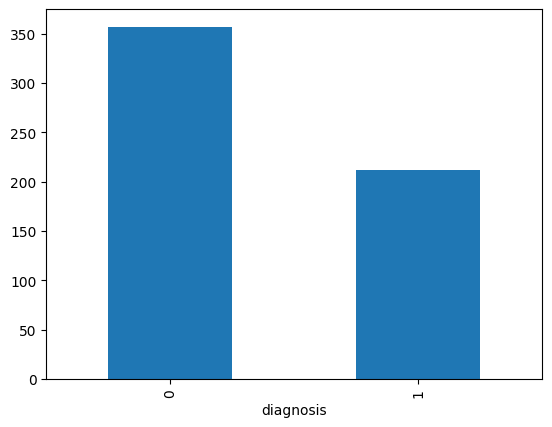

In [5]:
data['diagnosis']=data['diagnosis'].astype("category", copy=False)
data['diagnosis'].value_counts().plot(kind='bar')

In [7]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
#Separating features and target
y=data.diagnosis#target varaible
X=data.drop(['diagnosis'], axis=1)

In [9]:
X=np.asarray(X)
y=np.asarray(y)

# GridSearch CV 


In [10]:
#loading the SVC model
model=SVC()


In [11]:
#hyperparameters
parameters={
    'kernel':['linear','poly','rbf','sigmoid'],
    'C':[1,5,10,20]
}

In [12]:
#grid search
classifier=GridSearchCV(model,parameters,cv=5)

In [13]:
#fitting the data to our model
classifier.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [14]:
classifier.cv_results_

{'mean_fit_time': array([4.49876194e+00, 7.94420242e-03, 1.12778664e-02, 3.38520527e-02,
        1.23614380e+01, 1.34628773e-02, 9.07292366e-03, 2.80788422e-02,
        9.31602092e+00, 3.12952995e-03, 1.09770298e-02, 2.33378410e-02,
        1.33222640e+01, 1.32853031e-02, 1.52822495e-02, 1.90536022e-02]),
 'std_fit_time': array([1.00275738, 0.00934929, 0.00635716, 0.02122663, 3.83258771,
        0.00587324, 0.00742858, 0.00621857, 2.39699816, 0.00625906,
        0.00623036, 0.00670366, 2.74866029, 0.00431505, 0.00502717,
        0.00682622]),
 'mean_score_time': array([0.01044283, 0.00582747, 0.00802255, 0.00710535, 0.00412927,
        0.00060005, 0.0107821 , 0.00428925, 0.00293612, 0.01240106,
        0.0036263 , 0.0057786 , 0.00414701, 0.00060658, 0.00452385,
        0.00741363]),
 'std_score_time': array([0.01929401, 0.00517401, 0.00597603, 0.00657719, 0.00607187,
        0.0012001 , 0.0063412 , 0.00594646, 0.00492865, 0.00620334,
        0.00608882, 0.00575258, 0.00586879, 0.001213

In [15]:
#best parameters 

best_parameters=classifier.best_params_
print(best_parameters)

{'C': 5, 'kernel': 'linear'}


In [16]:
#highest accuracy
highest_accuracy=classifier.best_score_
print(highest_accuracy)

0.952585002328831


In [17]:
#loading the results to pandas dataframe
result=pd.DataFrame(classifier.cv_results_)

In [18]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.498762,1.002757,0.010443,0.019294,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.007944,0.009349,0.005827,0.005174,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.011278,0.006357,0.008023,0.005976,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.033852,0.021227,0.007105,0.006577,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,12.361438,3.832588,0.004129,0.006072,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.973451,0.952585,0.018008,1


In [19]:
grid_search_results=result[['param_C','param_kernel','mean_test_score']]

In [20]:
print(grid_search_results)

   param_C param_kernel  mean_test_score
0        1       linear         0.945536
1        1         poly         0.908663
2        1          rbf         0.912172
3        1      sigmoid         0.460441
4        5       linear         0.952585
5        5         poly         0.922729
6        5          rbf         0.931501
7        5      sigmoid         0.411178
8       10       linear         0.950815
9       10         poly         0.920975
10      10          rbf         0.922714
11      10      sigmoid         0.402391
12      20       linear         0.950815
13      20         poly         0.919221
14      20          rbf         0.920944
15      20      sigmoid         0.398867


Highest Accuarcy =95.2585002328831%

Best Parameters={'C': 5, 'kernel': 'linear'}

# RandamonSearch CV

In [21]:
#loading the SVC model
model=SVC()


In [22]:
#hyperparameters
parameters={
    'kernel':['linear','poly','rbf','sigmoid'],
    'C':[1,5,10,20]
}

In [24]:
#randomized search
classifier=RandomizedSearchCV(model,parameters,cv=5)

In [25]:
#fitting the data to our model
classifier.fit(X,y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [26]:
classifier.cv_results_

{'mean_fit_time': array([1.70443535e-02, 1.35425787e+01, 2.82985210e-02, 1.93475246e-02,
        2.34120846e-02, 1.72131062e-02, 1.28808980e+01, 2.01670720e+01,
        2.52518177e-02, 1.89879417e-02]),
 'std_fit_time': array([4.32831134e-03, 3.85909537e+00, 9.06121489e-03, 6.09147821e-03,
        4.75783324e-03, 2.53853467e-03, 3.39003569e+00, 3.75329622e+00,
        7.87686241e-03, 9.81966082e-03]),
 'mean_score_time': array([0.01102729, 0.00302825, 0.00856724, 0.00360851, 0.01504068,
        0.01195102, 0.00160446, 0.00630207, 0.00722637, 0.0010026 ]),
 'std_score_time': array([0.0032038 , 0.00277812, 0.00550943, 0.00301539, 0.00750534,
        0.00377028, 0.00135918, 0.00524094, 0.00709289, 0.0020052 ]),
 'param_kernel': masked_array(data=['rbf', 'linear', 'poly', 'poly', 'rbf', 'rbf',
                    'linear', 'linear', 'sigmoid', 'poly'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
    

In [27]:
#best parameters 

best_parameters=classifier.best_params_
print(best_parameters)

{'kernel': 'linear', 'C': 5}


In [28]:
#highest accuracy
highest_accuracy=classifier.best_score_
print(highest_accuracy)

0.952585002328831


In [29]:
#loading the results to pandas dataframe
result=pd.DataFrame(classifier.cv_results_)

In [30]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017044,0.004328,0.011027,0.003204,rbf,5,"{'kernel': 'rbf', 'C': 5}",0.885965,0.929825,0.938596,0.947368,0.955752,0.931501,0.024358,4
1,13.542579,3.859095,0.003028,0.002778,linear,5,"{'kernel': 'linear', 'C': 5}",0.947368,0.938596,0.973684,0.929825,0.973451,0.952585,0.018008,1
2,0.028299,0.009061,0.008567,0.005509,poly,5,"{'kernel': 'poly', 'C': 5}",0.885965,0.912281,0.921053,0.938596,0.955752,0.922729,0.023689,5
3,0.019348,0.006091,0.003609,0.003015,poly,10,"{'kernel': 'poly', 'C': 10}",0.885965,0.921053,0.903509,0.938596,0.955752,0.920975,0.024701,6
4,0.023412,0.004758,0.015041,0.007505,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,9


In [31]:
randomized_search_results=result[['param_C','param_kernel','mean_test_score']]

In [32]:
print(randomized_search_results)

  param_C param_kernel  mean_test_score
0       5          rbf         0.931501
1       5       linear         0.952585
2       5         poly         0.922729
3      10         poly         0.920975
4       1          rbf         0.912172
5      20          rbf         0.920944
6      10       linear         0.950815
7      20       linear         0.950815
8       5      sigmoid         0.411178
9      20         poly         0.919221


Highest Accuarcy =95.258500%

Best Parameters={'C': 5, 'kernel': 'linear'}

In [33]:
#model building
#Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
#Normalization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [36]:
#loading the SVC model
model=SVC(C=5, kernel= 'linear')


In [37]:
model.fit(X_train,y_train)

SVC(C=5, kernel='linear')

In [38]:
#predict the target variable on test data
y_pred=model.predict(X_test)

In [39]:
#evaluate model performance
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.965034965034965

# Bayesian Optimization


In [49]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [62]:
# Define the objective function to be maximized
def svc_cv(C, kernel):
    # Map integer values to corresponding string values for 'kernel'
    kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
    kernel = kernel_values[int(kernel)]
    
    # Convert C to integer, as Bayesian Optimization deals with integers
    C = int(C)
    
    # Define SVC with the given hyperparameters
    svc = SVC(C=C, kernel=kernel, random_state=42)
    
    # Perform cross-validation and return the mean accuracy
    return np.mean(cross_val_score(svc, X, y, cv=5, scoring='accuracy'))

In [63]:
 #Define the search space for hyperparameters
pbounds = {'C': (1, 20), 'kernel': (0, 3)}

In [64]:
# Create BayesianOptimization object
optimizer = BayesianOptimization(f=svc_cv, pbounds=pbounds, random_state=42)

# Perform optimization
optimizer.maximize(init_points=5, n_iter=10)

|   iter    |  target   |     C     |  kernel   |
-------------------------------------------------
| 1         | 0.9227    | 8.116     | 2.852     |


| 2         | 0.9192    | 14.91     | 1.796     |
| 3         | 0.9508    | 3.964     | 0.468     |
| 4         | 0.9245    | 2.104     | 2.599     |
| 5         | 0.921     | 12.42     | 2.124     |
| 6         | 0.9561    | 4.629     | 0.0       |
| 7         | 0.9543    | 6.653     | 0.0       |
| 8         | 0.9508    | 20.0      | 0.0       |
| 9         | 0.3989    | 20.0      | 3.0       |
| 10        | 0.9508    | 10.03     | 0.0       |
| 11        | 0.9455    | 1.0       | 0.0       |
| 12        | 0.4112    | 5.191     | 3.0       |
| 13        | 0.9227    | 10.07     | 2.084     |
| 14        | 0.9526    | 12.85     | 0.0       |
| 15        | 0.9526    | 17.03     | 0.0       |


In [65]:
# Extract the best hyperparameters
best_params = optimizer.max['params']
best_C = int(best_params['C'])
best_kernel = ['linear', 'poly', 'rbf', 'sigmoid'][int(best_params['kernel'])]

# Print the best hyperparameters
print(f"Best Hyperparameters: C={best_C}, kernel={best_kernel}")

Best Hyperparameters: C=4, kernel=linear
